# Reproducing Villena-Gonzalez CDA Study (2019)

### Notes:
- 'ER290419.bdf' (Cond '1', there are 210 events, instead of 32)
- Different graph than paper (quite significantly) - can't reproduce the diff between 2 and 4 targets
- Channels with strong CDA are more frontal...

- Using -400ms to -200ms as a baseline correction from mem cue.

In [1]:
import numpy as np
import glob
import pickle
import pandas as pd

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/')
from events import get_specific_events, get_epochs, get_CDA
from events import prep_report, fill_report, get_report, checksum, add_cda_report, get_CDA_perf_report
 
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load, Prep & CDA

Processing: LS150419.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/LS150419.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 790527  =      0.000 ...   386.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65577 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
380 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65577 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
380 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
-------------------

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 22 epochs: 6, 7, 9, 11, 17, 21, 22, 24, 32, 34, 38, 44, 49, 52, 57, 63, 65, 75, 77, 80, 81, 82


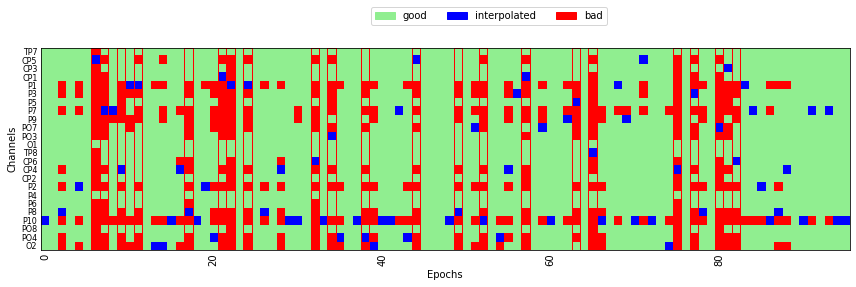

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[LS150419.bdf] Adding Mean CDA Amp for 1-left-good: 1.1843113179822375
[LS150419.bdf] Skipping: 1-left-bad
[LS150419.bdf] Adding Mean CDA Amp for 1-right-good: -0.42151589725047167
[LS150419.bdf] Skipping: 1-right-bad
[LS150419.bdf] Adding Mean CDA Amp for 2-left-good: 1.585800079987539
[LS150419.bdf] Adding Mean CDA Amp for 2-left-bad: -4.429796582314905
[LS150419.bdf] Adding Mean CDA Amp for 2-right-good: 2.210938487807524
[LS150419.bdf] Adding Mean CDA Amp for 2-right-bad: nan
[LS150419.bdf] 

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:155: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_right = epochs_right.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:156: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_left = epochs_left.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Ville

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
384 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
384 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 5 epochs: 19, 24, 26, 35, 92


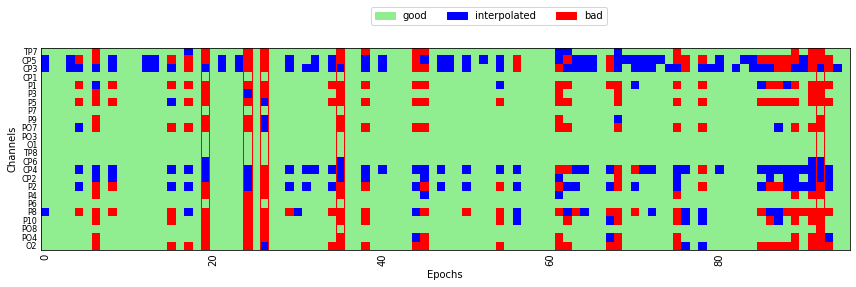

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[DN250319.bdf] Adding Mean CDA Amp for 1-left-good: -0.7662273528618052
[DN250319.bdf] Skipping: 1-left-bad
[DN250319.bdf] Adding Mean CDA Amp for 1-right-good: 0.8752567148510103
[DN250319.bdf] Adding Mean CDA Amp for 1-right-bad: 1.052163333830523
[DN250319.bdf] Adding Mean CDA Amp for 2-left-good: 0.6004991521204421
[DN250319.bdf] Adding Mean CDA Amp for 2-left-bad: 1.2336774601788933
[DN250319.bdf] Adding Mean CDA Amp for 2-right-good: 1.4389673539373662
[DN250319.bdf] Adding Mean CDA Amp fo

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 48 epochs: 0, 1, 4, 5, 6, 13, 15, 17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 31, 32, 33, 34, 46, 49, 50, 52, 55, 56, 62, 63, 64, 65, 66, 67, 68, 75, 77, 79, 80, 81, 82, 85, 86, 87, 90, 91, 92, 93, 94


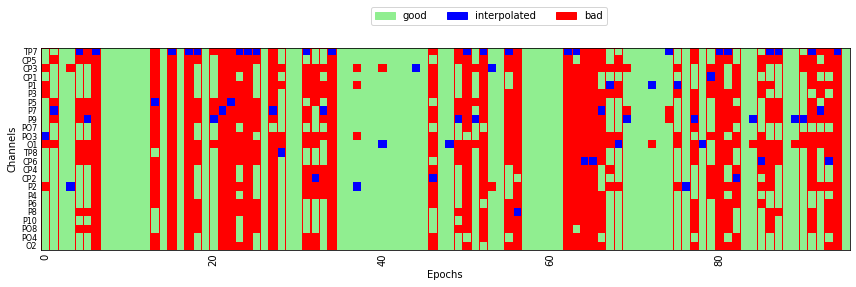

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[LF210119.bdf] Adding Mean CDA Amp for 1-left-good: -1.0546577886365962
[LF210119.bdf] Adding Mean CDA Amp for 1-left-bad: nan
[LF210119.bdf] Adding Mean CDA Amp for 1-right-good: 0.485025288147691
[LF210119.bdf] Skipping: 1-right-bad
[LF210119.bdf] Adding Mean CDA Amp for 2-left-good: 5.0784243309302575
[LF210119.bdf] Adding Mean CDA Amp for 2-left-bad: 1.3505191321873027
[LF210119.bdf] Adding Mean CDA Amp for 2-right-good: -2.654012467426731
[LF210119.bdf] Skipping: 2-right-bad
[LF210119.bdf] 

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:155: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_right = epochs_right.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:156: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_left = epochs_left.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Use

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
381 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
381 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 1 epoch: 32


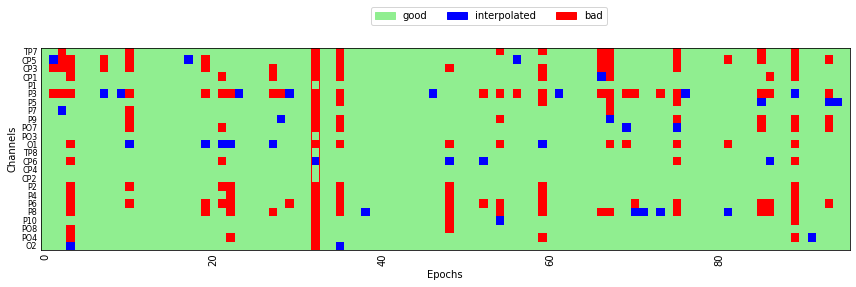

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[FR070119.bdf] Adding Mean CDA Amp for 1-left-good: 4.309538672663382
[FR070119.bdf] Skipping: 1-left-bad
[FR070119.bdf] Adding Mean CDA Amp for 1-right-good: 1.6475847154476742
[FR070119.bdf] Adding Mean CDA Amp for 1-right-bad: 3.4345186676974264
[FR070119.bdf] Adding Mean CDA Amp for 2-left-good: 6.386379907938549
[FR070119.bdf] Adding Mean CDA Amp for 2-left-bad: 4.0560713730170805
[FR070119.bdf] Adding Mean CDA Amp for 2-right-good: 4.023061727885731
[FR070119.bdf] Skipping: 2-right-bad
[FR

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 4 epochs: 4, 10, 28, 67


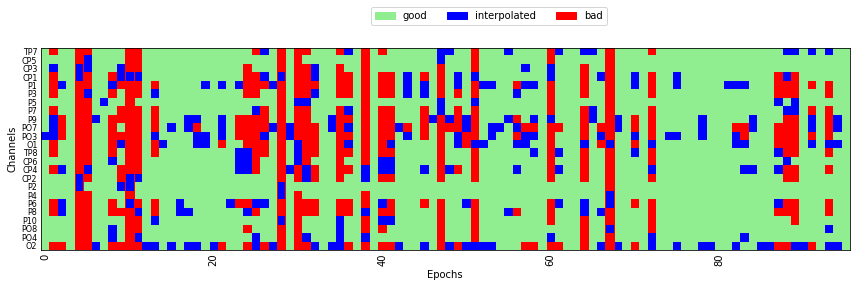

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[IP020519.bdf] Adding Mean CDA Amp for 1-left-good: 1.2164861507899232
[IP020519.bdf] Skipping: 1-left-bad
[IP020519.bdf] Adding Mean CDA Amp for 1-right-good: -0.12122741215212242
[IP020519.bdf] Adding Mean CDA Amp for 1-right-bad: 6.843952862973761
[IP020519.bdf] Adding Mean CDA Amp for 2-left-good: 1.30600919821598
[IP020519.bdf] Adding Mean CDA Amp for 2-left-bad: -4.644367371557203
[IP020519.bdf] Adding Mean CDA Amp for 2-right-good: 3.687175950107222
[IP020519.bdf] Skipping: 2-right-bad
[I

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
380 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
380 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


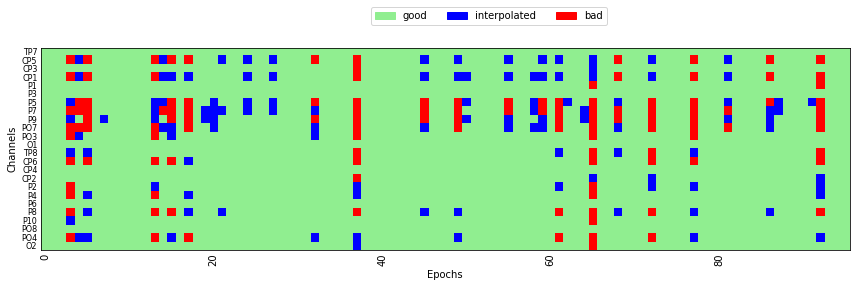

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[LB020419.bdf] Adding Mean CDA Amp for 1-left-good: -2.192124615145321
[LB020419.bdf] Skipping: 1-left-bad
[LB020419.bdf] Adding Mean CDA Amp for 1-right-good: 2.783671450742553
[LB020419.bdf] Skipping: 1-right-bad
[LB020419.bdf] Adding Mean CDA Amp for 2-left-good: -1.8686926297187154
[LB020419.bdf] Adding Mean CDA Amp for 2-left-bad: -0.3264503916882804
[LB020419.bdf] Adding Mean CDA Amp for 2-right-good: 0.31119535120147246
[LB020419.bdf] Adding Mean CDA Amp for 2-right-bad: 0.927724601789447

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
376 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
376 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


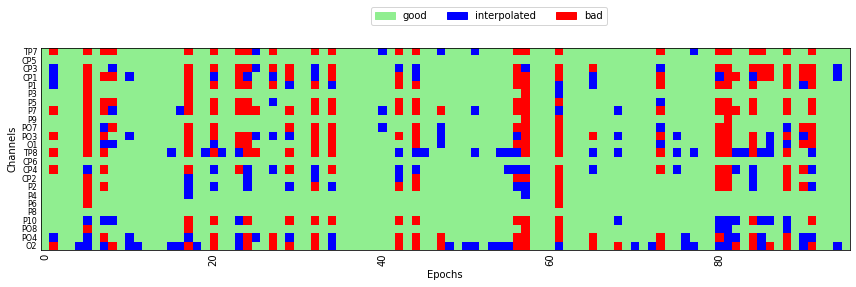

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[JH290119.bdf] Adding Mean CDA Amp for 1-left-good: 3.094958865258718
[JH290119.bdf] Adding Mean CDA Amp for 1-left-bad: 5.717320692685046
[JH290119.bdf] Adding Mean CDA Amp for 1-right-good: 2.5196620330477515
[JH290119.bdf] Skipping: 1-right-bad
[JH290119.bdf] Adding Mean CDA Amp for 2-left-good: 2.3765883033696014
[JH290119.bdf] Adding Mean CDA Amp for 2-left-bad: 4.317263265759095
[JH290119.bdf] Adding Mean CDA Amp for 2-right-good: 2.4495520568776596
[JH290119.bdf] Adding Mean CDA Amp for 2

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
371 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
371 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 4 epochs: 11, 31, 72, 87


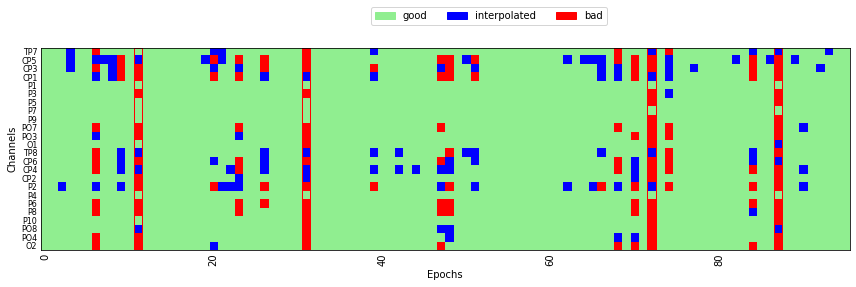

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[RM280119.bdf] Adding Mean CDA Amp for 1-left-good: -0.269788431204271
[RM280119.bdf] Adding Mean CDA Amp for 1-left-bad: -0.409716720633249
[RM280119.bdf] Adding Mean CDA Amp for 1-right-good: 0.20939613084856568
[RM280119.bdf] Adding Mean CDA Amp for 1-right-bad: nan
[RM280119.bdf] Adding Mean CDA Amp for 2-left-good: 0.04343302396132319
[RM280119.bdf] Adding Mean CDA Amp for 2-left-bad: -0.0560066868905639
[RM280119.bdf] Adding Mean CDA Amp for 2-right-good: 0.1117770035365106
[RM280119.bdf] 

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:155: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_right = epochs_right.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:156: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_left = epochs_left.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Ville

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 2 epochs: 1, 71


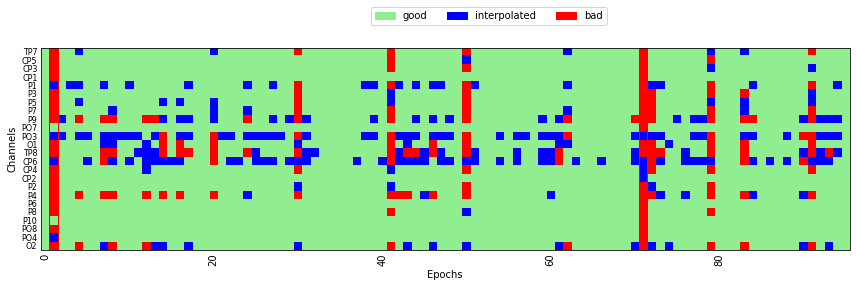

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[CS230419.bdf] Adding Mean CDA Amp for 1-left-good: 5.724612213170223
[CS230419.bdf] Adding Mean CDA Amp for 1-left-bad: 8.893402681065702
[CS230419.bdf] Adding Mean CDA Amp for 1-right-good: 2.3063968315208925
[CS230419.bdf] Skipping: 1-right-bad
[CS230419.bdf] Adding Mean CDA Amp for 2-left-good: 7.359862748110589
[CS230419.bdf] Skipping: 2-left-bad
[CS230419.bdf] Adding Mean CDA Amp for 2-right-good: 8.241556013293772
[CS230419.bdf] Skipping: 2-right-bad
[CS230419.bdf] Adding Mean CDA Amp for

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
381 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
381 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 4 epochs: 8, 17, 58, 71


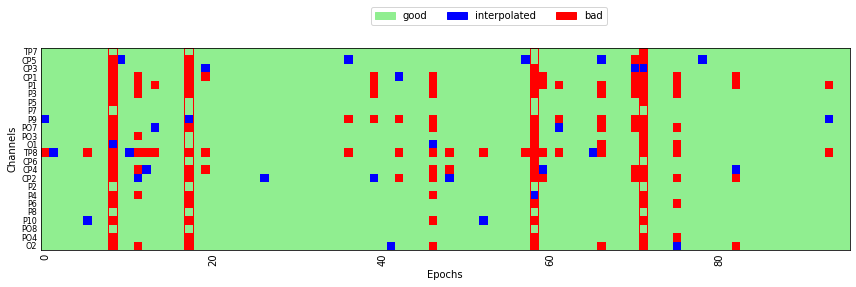

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[VK030119.bdf] Adding Mean CDA Amp for 1-left-good: 1.4411834846155445
[VK030119.bdf] Skipping: 1-left-bad
[VK030119.bdf] Adding Mean CDA Amp for 1-right-good: -1.0851013194766221
[VK030119.bdf] Adding Mean CDA Amp for 1-right-bad: -0.6519879942877244
[VK030119.bdf] Adding Mean CDA Amp for 2-left-good: 0.17885559574328858
[VK030119.bdf] Adding Mean CDA Amp for 2-left-bad: 0.9720047485023408
[VK030119.bdf] Adding Mean CDA Amp for 2-right-good: 2.303164175217453
[VK030119.bdf] Skipping: 2-right-ba

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=23


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


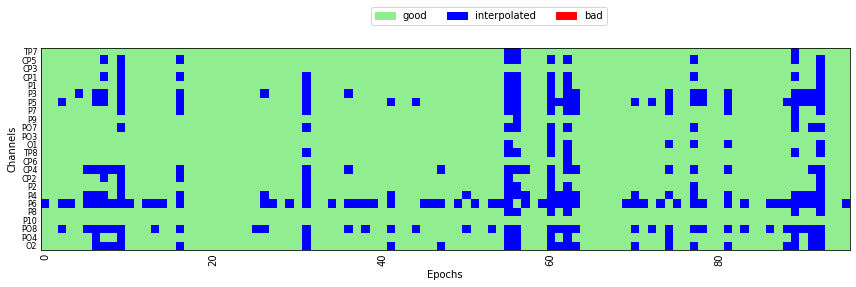

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[DS220119.bdf] Adding Mean CDA Amp for 1-left-good: -2.0881439879172183
[DS220119.bdf] Adding Mean CDA Amp for 1-left-bad: -1.020601036564325
[DS220119.bdf] Adding Mean CDA Amp for 1-right-good: 2.8788321275939825
[DS220119.bdf] Skipping: 1-right-bad
[DS220119.bdf] Adding Mean CDA Amp for 2-left-good: -2.0413647617981487
[DS220119.bdf] Adding Mean CDA Amp for 2-left-bad: -3.391279550665559
[DS220119.bdf] Adding Mean CDA Amp for 2-right-good: 6.857437295147346
[DS220119.bdf] Skipping: 2-right-bad

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 4 epochs: 63, 80, 88, 89


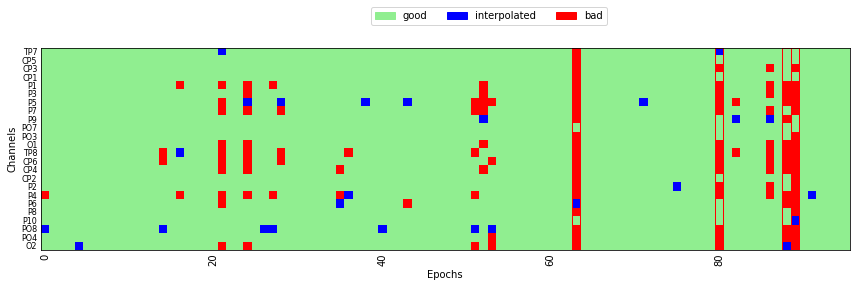

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[DR210119.bdf] Adding Mean CDA Amp for 1-left-good: 2.0076308499940767
[DR210119.bdf] Skipping: 1-left-bad
[DR210119.bdf] Adding Mean CDA Amp for 1-right-good: -3.4073512265722092
[DR210119.bdf] Skipping: 1-right-bad
[DR210119.bdf] Adding Mean CDA Amp for 2-left-good: 1.27521649214061
[DR210119.bdf] Adding Mean CDA Amp for 2-left-bad: 3.2347562515703703
[DR210119.bdf] Adding Mean CDA Amp for 2-right-good: 0.32851613735630636
[DR210119.bdf] Adding Mean CDA Amp for 2-right-bad: -1.2478683453746078

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.20 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 60 epochs: 0, 1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 22, 25, 27, 29, 30, 31, 33, 35, 36, 38, 39, 41, 44, 45, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62, 64, 66, 69, 71, 72, 74, 75, 78, 79, 81, 82, 83, 84, 85, 89, 90, 92, 93, 94


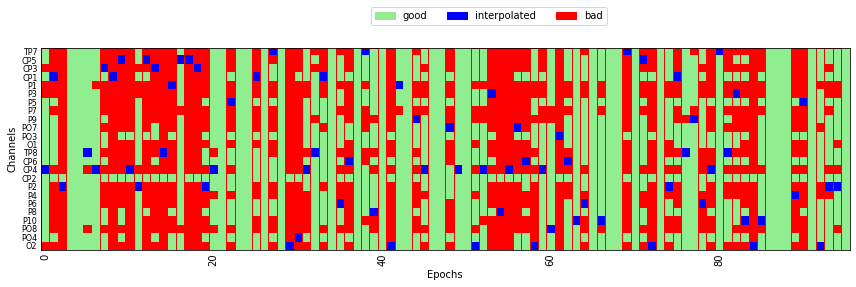

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[JC220119.bdf] Adding Mean CDA Amp for 1-left-good: -1.9177228767969363
[JC220119.bdf] Skipping: 1-left-bad
[JC220119.bdf] Adding Mean CDA Amp for 1-right-good: -1.502975663353818
[JC220119.bdf] Skipping: 1-right-bad
[JC220119.bdf] Adding Mean CDA Amp for 2-left-good: 1.1920008679062837
[JC220119.bdf] Adding Mean CDA Amp for 2-left-bad: -2.1380888795369306
[JC220119.bdf] Adding Mean CDA Amp for 2-right-good: -2.6138879572627793
[JC220119.bdf] Adding Mean CDA Amp for 2-right-bad: 0.18779072305128

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
368 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
368 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 4 epochs: 17, 29, 36, 78


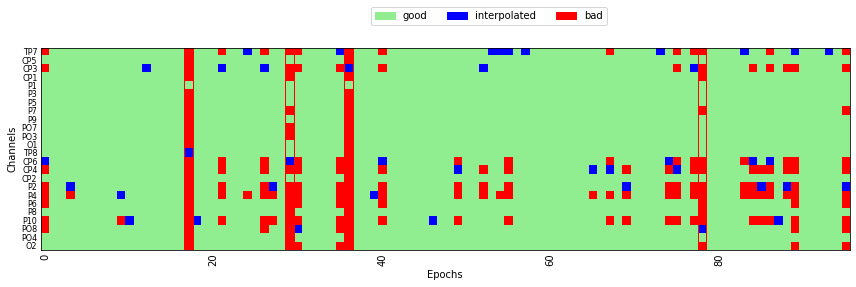

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[AP140119.bdf] Adding Mean CDA Amp for 1-left-good: 1.0212312071946676
[AP140119.bdf] Adding Mean CDA Amp for 1-left-bad: 3.905723645178789
[AP140119.bdf] Adding Mean CDA Amp for 1-right-good: 3.2569545635409467
[AP140119.bdf] Adding Mean CDA Amp for 1-right-bad: -6.311661299377477
[AP140119.bdf] Adding Mean CDA Amp for 2-left-good: 3.998022971824359
[AP140119.bdf] Adding Mean CDA Amp for 2-left-bad: 2.4820892510113595
[AP140119.bdf] Adding Mean CDA Amp for 2-right-good: 4.422914281638201
[AP140

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65791 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 16 epochs: 6, 17, 22, 28, 32, 36, 54, 56, 64, 66, 68, 78, 80, 82, 85, 89


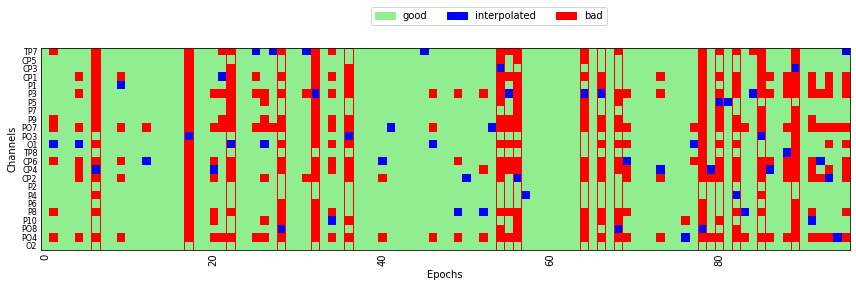

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[CA080119.bdf] Adding Mean CDA Amp for 1-left-good: -0.20213758942518098
[CA080119.bdf] Skipping: 1-left-bad
[CA080119.bdf] Adding Mean CDA Amp for 1-right-good: -0.17360007892751916
[CA080119.bdf] Skipping: 1-right-bad
[CA080119.bdf] Adding Mean CDA Amp for 2-left-good: 3.3667247353291976
[CA080119.bdf] Adding Mean CDA Amp for 2-left-bad: 1.5325593876311707
[CA080119.bdf] Adding Mean CDA Amp for 2-right-good: 0.37461257457991526
[CA080119.bdf] Adding Mean CDA Amp for 2-right-bad: -3.69293679128

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1273 events found
Event IDs: [    1    10    11    12    13    20    21    22    23    30    31    32
    33    40    41    42    43    50    51    52    53    60    61    62
    63    64    65    66    67    68    69    70    71    72    73    74
    75    76    77    78    79    80    81 65536]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1273 events found
Event IDs: [    1    10    11    12    13    20    21    22    23    30    31    32
    33    40    41    42    43    50    51    52    53    60    61    62
    63    64    65    66    67    68    69    70    71    72    73    74
    75    76    77    78    79    80   

Not setting metadata
259 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 259 events and 1640 original time points ...
0 bad epochs dropped
A total of 259 epochs were extracted and baseline corrected.
Running autoreject on ch_type=eeg


/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/259 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/259 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/259 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/259 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=4


  0%|          | Repairing epochs : 0/259 [00:00<?,       ?it/s]

Dropped 35 epochs: 19, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 54, 81, 139, 140, 141, 143, 145, 146, 148, 149, 154, 158, 160, 168, 176, 183, 186, 187, 188, 193, 223, 235, 252


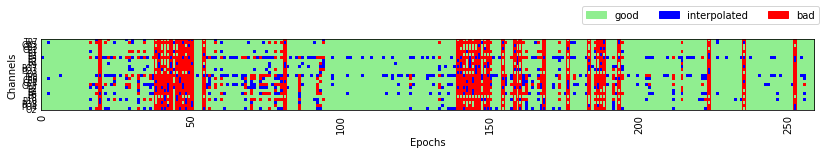

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[ER290419.bdf] Adding Mean CDA Amp for 1-left-good: 1.132999625928709
[ER290419.bdf] Adding Mean CDA Amp for 1-left-bad: 3.84070151435565
[ER290419.bdf] Adding Mean CDA Amp for 1-right-good: -1.8976697813838284
[ER290419.bdf] Adding Mean CDA Amp for 1-right-bad: -3.0547385951728283
[ER290419.bdf] Adding Mean CDA Amp for 2-left-good: -1.1733133850628226
[ER290419.bdf] Skipping: 2-left-bad
[ER290419.bdf] Adding Mean CDA Amp for 2-right-good: 2.790066490043396
[ER290419.bdf] Adding Mean CDA Amp for

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


Adding Mean Amp: 1.9043428645013937e-06
Adding Mean Amp: 1.1362787517943918e-05
Adding Mean Amp: 9.109663595334856e-06
Adding Mean Amp: -1.2228141890172762e-05
Adding Mean Amp: 9.62511711390055e-07
Adding Mean Amp: -8.214062959250582e-08
Adding Mean Amp: -9.424220057642925e-06
Adding Mean Amp: -6.1082001263989975e-06
Adding Mean Amp: -1.1369902099474321e-05
Adding Mean Amp: 2.462896619806752e-06
Adding Mean Amp: 3.2607682742888303e-06
Adding Mean Amp: -7.218421622333542e-06
Adding Mean Amp: 2.2048844154610982e-06
Adding Mean Amp: -1.331308604598053e-06
Adding Mean Amp: 1.2386109718790474e-06
Adding Mean Amp: -3.5575858438396685e-06
Adding Mean Amp: 1.323908240668231e-06
Adding Mean Amp: -1.9193367273290985e-06
Adding Mean Amp: 7.898139666780156e-07
Adding Mean Amp: 7.887277202431e-06
Adding Mean Amp: 8.438388333008577e-06
Adding Mean Amp: 1.6226256818357763e-07
Adding Mean Amp: 1.3702464251702468e-06
Adding Mean Amp: -6.993151198324031e-06
Adding Mean Amp: -2.1554459225587672e-05
Addin

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 1 epoch: 7


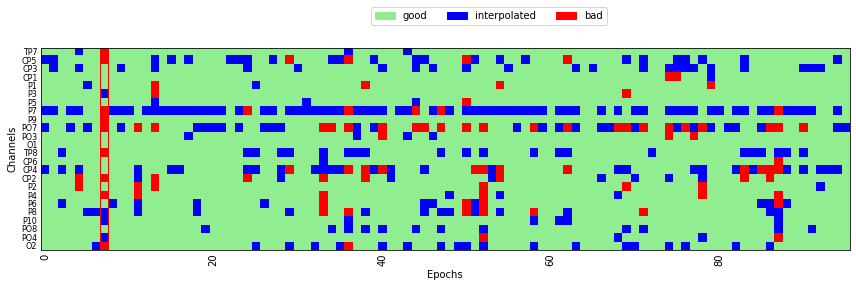

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[BO090419.bdf] Adding Mean CDA Amp for 1-left-good: -2.143276763028216
[BO090419.bdf] Skipping: 1-left-bad
[BO090419.bdf] Adding Mean CDA Amp for 1-right-good: 1.0195887136799433
[BO090419.bdf] Adding Mean CDA Amp for 1-right-bad: 6.369049630174823
[BO090419.bdf] Adding Mean CDA Amp for 2-left-good: -1.388280481543529
[BO090419.bdf] Skipping: 2-left-bad
[BO090419.bdf] Adding Mean CDA Amp for 2-right-good: 5.478144813293696
[BO090419.bdf] Skipping: 2-right-bad
[BO090419.bdf] Adding Mean CDA Amp f

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65569 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65569 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 27 epochs: 0, 7, 12, 19, 20, 21, 28, 31, 32, 33, 36, 41, 48, 49, 50, 58, 59, 60, 65, 66, 69, 74, 76, 77, 81, 86, 91


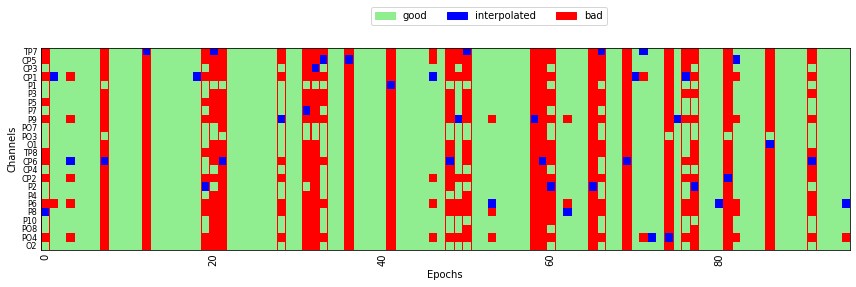

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[RG100419.bdf] Adding Mean CDA Amp for 1-left-good: -0.1526824100688324
[RG100419.bdf] Adding Mean CDA Amp for 1-left-bad: 1.187463189771035
[RG100419.bdf] Adding Mean CDA Amp for 1-right-good: -0.19098612350193475
[RG100419.bdf] Adding Mean CDA Amp for 1-right-bad: nan
[RG100419.bdf] Adding Mean CDA Amp for 2-left-good: -0.036977171550251355
[RG100419.bdf] Skipping: 2-left-bad
[RG100419.bdf] Adding Mean CDA Amp for 2-right-good: 2.601363260162668
[RG100419.bdf] Adding Mean CDA Amp for 2-right-b

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:155: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_right = epochs_right.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:156: RuntimeWarning: evoked object is empty (based on less than 1 epoch)
  evoked_left = epochs_left.average()
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65559 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65559 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=1.00 and n_interpolate=23


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


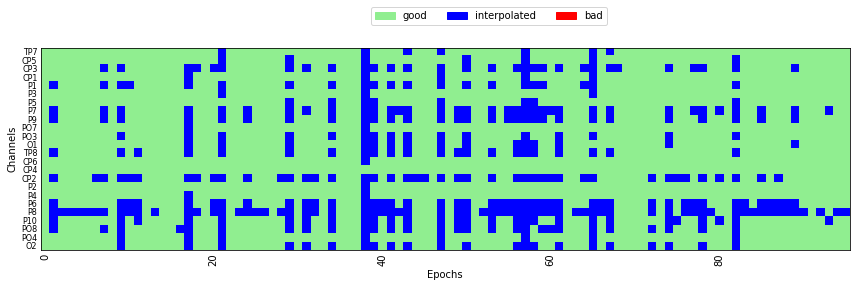

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[MM220419.bdf] Adding Mean CDA Amp for 1-left-good: 0.5314238847074725
[MM220419.bdf] Skipping: 1-left-bad
[MM220419.bdf] Adding Mean CDA Amp for 1-right-good: 1.1118908460197678
[MM220419.bdf] Adding Mean CDA Amp for 1-right-bad: -16.074941636161544
[MM220419.bdf] Adding Mean CDA Amp for 2-left-good: 0.4023353126258812
[MM220419.bdf] Skipping: 2-left-bad
[MM220419.bdf] Adding Mean CDA Amp for 2-right-good: 5.22471224067582
[MM220419.bdf] Skipping: 2-right-bad
[MM220419.bdf] Adding Mean CDA Amp 

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
384 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
384 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 2 epochs: 54, 73


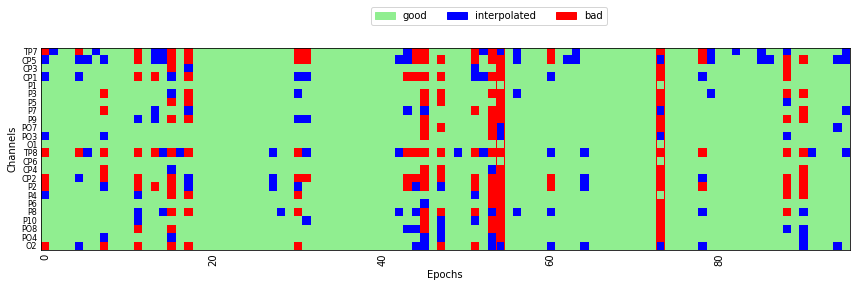

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[CJ250319.bdf] Adding Mean CDA Amp for 1-left-good: 0.23479546214424868
[CJ250319.bdf] Adding Mean CDA Amp for 1-left-bad: -1.2974312657166878
[CJ250319.bdf] Adding Mean CDA Amp for 1-right-good: -1.0233778321708378
[CJ250319.bdf] Skipping: 1-right-bad
[CJ250319.bdf] Adding Mean CDA Amp for 2-left-good: 2.062772338814544
[CJ250319.bdf] Adding Mean CDA Amp for 2-left-bad: -2.6115642474283445
[CJ250319.bdf] Adding Mean CDA Amp for 2-right-good: 0.35220826095038266
[CJ250319.bdf] Adding Mean CDA Am

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
379 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
379 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 21 epochs: 1, 9, 16, 20, 25, 29, 37, 48, 50, 52, 55, 56, 58, 64, 65, 76, 81, 84, 86, 88, 94


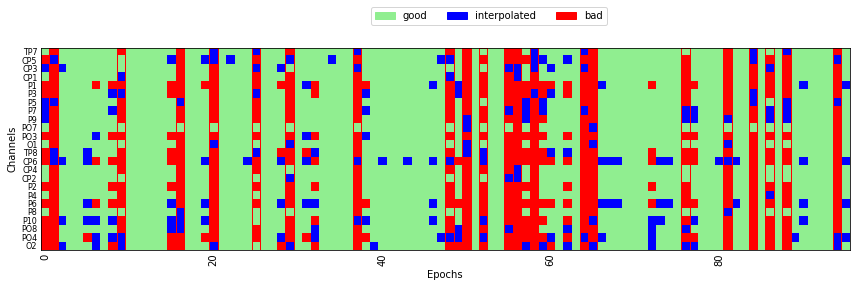

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[SS150119.bdf] Adding Mean CDA Amp for 1-left-good: -1.6564149986859544
[SS150119.bdf] Skipping: 1-left-bad
[SS150119.bdf] Adding Mean CDA Amp for 1-right-good: -1.7620116198029532
[SS150119.bdf] Skipping: 1-right-bad
[SS150119.bdf] Adding Mean CDA Amp for 2-left-good: -1.1071160592115785
[SS150119.bdf] Adding Mean CDA Amp for 2-left-bad: -0.7660756140671754
[SS150119.bdf] Adding Mean CDA Amp for 2-right-good: 0.7605814733327391
[SS150119.bdf] Skipping: 2-right-bad
[SS150119.bdf] Adding Mean CDA

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65734 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
383 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 7 epochs: 5, 9, 12, 20, 44, 62, 76


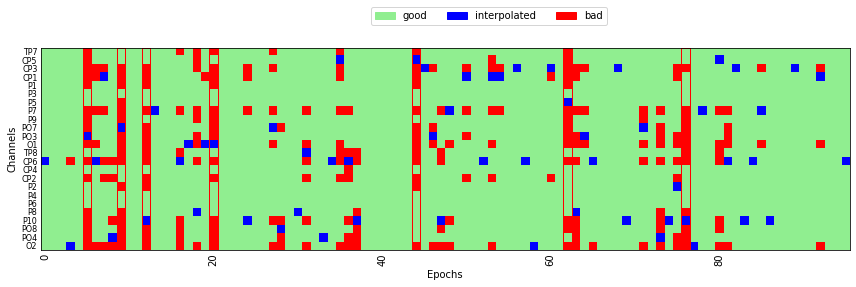

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[BG160419.bdf] Adding Mean CDA Amp for 1-left-good: 0.64196206715775
[BG160419.bdf] Skipping: 1-left-bad
[BG160419.bdf] Adding Mean CDA Amp for 1-right-good: -2.5821963395557095
[BG160419.bdf] Adding Mean CDA Amp for 1-right-bad: 4.172785476099223
[BG160419.bdf] Adding Mean CDA Amp for 2-left-good: 2.015873932260779
[BG160419.bdf] Adding Mean CDA Amp for 2-left-bad: -9.145820290620083
[BG160419.bdf] Adding Mean CDA Amp for 2-right-good: -0.40251070870440075
[BG160419.bdf] Skipping: 2-right-bad
[

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:112: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  all_epochs = Epochs(eeg, all_events, tmin=epoch_tmin, tmax=epoch_length, baseline=baseline_corr, preload=True, event_repeated='merge')


  0%|          | Creating augmented epochs : 0/24 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/24 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/mne/bem.py:967: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nick/opt/miniconda3/envs/clct/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/96 [00:00<?,       ?it/s]

Dropped 19 epochs: 2, 3, 4, 23, 32, 35, 37, 44, 45, 46, 54, 56, 57, 66, 67, 86, 91, 94, 95


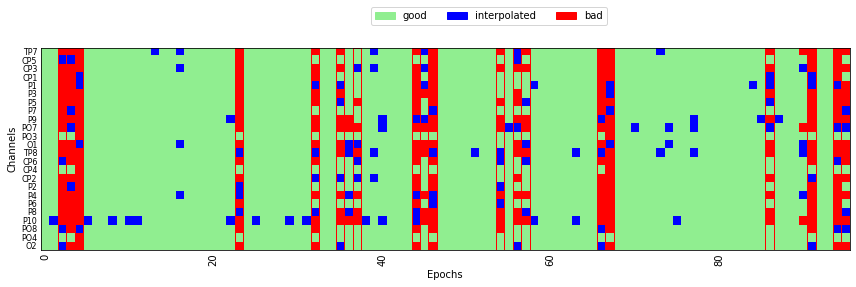

---------- 1-left-good -------------
---------- 1-left-bad -------------
---------- 1-right-good -------------
---------- 1-right-bad -------------
---------- 2-left-good -------------
---------- 2-left-bad -------------
---------- 2-right-good -------------
---------- 2-right-bad -------------
---------- 4-left-good -------------
---------- 4-left-bad -------------
---------- 4-right-good -------------
---------- 4-right-bad -------------
====================== /EPOCHING ======================
[CM190319.bdf] Adding Mean CDA Amp for 1-left-good: 1.3113226868413845
[CM190319.bdf] Adding Mean CDA Amp for 1-left-bad: -0.22500100711724597
[CM190319.bdf] Adding Mean CDA Amp for 1-right-good: -1.826216873504617
[CM190319.bdf] Skipping: 1-right-bad
[CM190319.bdf] Adding Mean CDA Amp for 2-left-good: 1.7343083754645972
[CM190319.bdf] Skipping: 2-left-bad
[CM190319.bdf] Adding Mean CDA Amp for 2-right-good: -0.24145635977605928
[CM190319.bdf] Skipping: 2-right-bad
[CM190319.bdf] Adding Mean CDA

/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:295: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:306: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA'.format(cond,side,perf)]))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:308: RuntimeWarning: Mean of empty slice
  report.at[filename,'{}-{}-CDA'.format(cond, perf)] = np.nanmean(cda_means)
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:309: RuntimeWarning: Mean of empty slice
  print('Cond: {} | Perf: {}, Mean: {}'.format(cond, perf, np.nanmean(cda_means)))
/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/events.py:317: RuntimeWarning: Mean of empty slice
  cda_means.append(np.nanmean(report.at[filename, '{}-{}-{}-CDA

,1,2,4,left,right,good,bad,1-left,1-left-CDA,1-left-good,...,4-right-good,4-right-good-CDA,right-good-CDA,4-right-bad,4-right-bad-CDA,right-bad-CDA,checksum,notes,good-CDA,bad-CDA
LS150419.bdf,32,32,32,48,48,81,15,16,0,16,...,9,0.257857,0.682427,7,1.308804,1.308804,0,,1.190552,-0.308427
DN250319.bdf,32,32,32,48,48,84,12,16,0,16,...,12,2.379914,1.564713,4,6.074822,1.274961,0,0,0.701102,1.042324
LF210119.bdf,32,32,32,48,48,85,11,16,0,15,...,11,1.668994,-0.166664,5,-0.973262,-0.973262,0,0,0.831101,5.1351
FR070119.bdf,32,32,32,48,48,82,14,16,0,16,...,12,2.197092,2.62258,4,0.355759,1.895139,0,0,4.169156,4.0403
IP020519.bdf,32,32,32,48,48,84,12,16,0,16,...,10,2.236926,1.934291,6,3.879069,5.361511,0,0,1.695575,3.327911
LB020419.bdf,32,32,32,48,48,77,19,16,0,16,...,13,2.228613,1.774493,3,0.334148,0.630936,1,0,0.333767,0.309229
JH290119.bdf,32,32,32,48,48,77,19,16,0,15,...,11,2.60651,2.525241,5,4.223731,3.813388,1,0,2.507709,3.769005
RM280119.bdf,32,32,32,48,48,76,20,16,0,15,...,7,0.252003,0.191059,9,1.493832,0.959698,0,0,-0.004142,0.455173
CS230419.bdf,32,32,32,48,48,92,4,16,0,15,...,14,9.157788,6.56858,2,15.735632,15.735632,0,0,6.591225,11.303922
VK030119.bdf,32,32,32,48,48,78,18,16,0,16,...,7,3.262355,1.493473,9,0.751326,0.049669,0,0,0.854757,0.001012


In [3]:
#==================================================================
# General Variables
#==================================================================
study_id = 'villena2019'

triggers = dict();

triggers['1'] = [10,11,12,13] 
triggers['2'] = [20,21,22,23]
triggers['4'] = [40,41,42,43]

triggers['left'] =  [10,13,20,23,40,43] #[11,12,21,22,41,42]
triggers['right'] = [11,12,21,22,41,42] #[10,13,20,23,40,43]

triggers['good'] = [60]
triggers['bad'] =  [61]
# --------------------------

# Labels
conds = ['1', '2', '4']
sides = ['left', 'right']
perfs = ['good', 'bad']

# Internal Triggers to Epochs Properly
internal_triggers = dict()
internal_triggers_count = 0
for cond in conds:
    for side in sides:
        for perf in perfs:
            internal_triggers_count = internal_triggers_count + 1
            internal_triggers['{}-{}-{}'.format(cond,side,perf)] = internal_triggers_count
            
# CDA Channels
chan_right = ['TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
chan_left =  ['TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1']

# Epoch information
epoch_length = 1.2
epoch_tmin = -0.4
baseline_corr = (-0.4, -0.2)

# CDA info
cda_window = (0.3, 0.9)

# CDA main variable!
cda_dict_all = dict()
epochs_dict_all = dict()
perf_report_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
#directory_path = 'D:\\CLNT\\Data\\Open Datasets\\Villena-Gonzalez 2019\\Data\\'
directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/'
sep = '/'

for filepath in glob.iglob(directory_path + '*.bdf'):
    filename = filepath[filepath.rfind(sep)+1:]
    print('Processing: ' + filename + '...')
   
    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})
    
    # Set Electrodes Locations
    montage = mne.channels.make_standard_montage('biosemi64')
    raw.set_montage(montage)

    # Resample
    preproc = raw.resample(1024)

    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)
        
    # Select Channels (to save time on cleaning)
    preproc = preproc.pick_channels(chan_right + chan_left)
    
    # Plot (visual check)
    #preproct.plot...
    
    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers, internal_triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr, clean=True)

    epochs_dict_all[filename] = epochs_dict
    
    # times, used for CDA mean amp report.
    times = epochs_dict[conds[0]][sides[0]][perfs[0]].times
    
    # ------------------------
    # 4. -- CDA --
    # ------------------------
    cda_dict_all[filename] = get_CDA(epochs_dict, conds, sides, perfs, chan_right, chan_left)
    
    # ------------------------
    # 6. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events)
    report = add_cda_report(report, filename, conds, sides, perfs, cda_dict_all[filename], times, cda_window=cda_window)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)
    
    perf_report_all[filename] = get_CDA_perf_report(epochs_dict, conds, sides, perfs, chan_right, chan_left, cda_window=cda_window)

# Print report
subreport = get_report(report, ['1','2', '4'], ['left','right'], ['good', 'bad'], [])
report

## 2. Plot Grand CDA Average

Text(0.5, 0, '[s]')

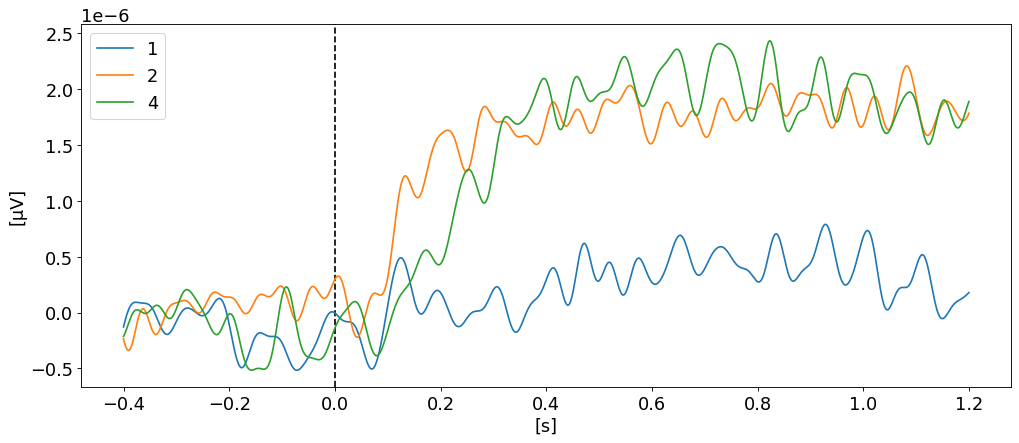

In [55]:
cda_all = dict()

for cond in cda_dict[list(cda_dict.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict.keys():
        if f == 'ER290419.bdf' and cond == '1':
            continue
        
        perf = 'good'
        ldict = cda_dict[f][cond]['left']
        rdict = cda_dict[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict[f][cond]['left'][perf] + cda_dict[f][cond]['right'][perf])/2            
            cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        else:
            print("==== SKIPPED: 0 points! (File: {} - Trigger: {})".format(str(f), str(t)))
            
plt.figure(figsize=(15, 6), dpi=80)
plt.axvline(x=0, color='k', linestyle='--')
plt.plot(times, cda_all['1'].mean(0), label='1')
plt.plot(times, cda_all['2'].mean(0), label='2')
plt.plot(times, cda_all['4'].mean(0), label='4')
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
#plt.savefig("./img/Villena-Gonzalez-2019_CDA-reprod.jpg", dpi=300)

## Save CDA Data

In [5]:
data_pickle = dict()
data_pickle['times'] = times
data_pickle['CDA'] = cda_dict_all
data_pickle['epochs'] = epochs_dict_all
data_pickle['report'] = report
data_pickle['report_perf'] = perf_report_all

with open("{}_clean-20hz.pkl".format(study_id),"wb") as f:
    pickle.dump(data_pickle, f)

## Load CDA Data

In [6]:
with open("{}_clean-20hz.pkl".format(study_id),"rb") as f:
    data_pickle = pickle.load(f)
    
times = data_pickle['times']
cda_dict_all = data_pickle['CDA']
epochs_dict_all = data_pickle['epochs']
report = data_pickle['report']
perf_report_all = data_pickle['report_perf']

len(cda_dict)

23

## Analysis - Bad Perf Trials

==== SKIPPED: 0 points! (File: LS150419.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: LB020419.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: DR210119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: JC220119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: CA080119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: SS150119.bdf - Cond: 1)
==== SKIPPED: 0 points! (File: CS230419.bdf - Cond: 2)
==== SKIPPED: 0 points! (File: BO090419.bdf - Cond: 2)
==== SKIPPED: 0 points! (File: MM220419.bdf - Cond: 2)
==== SKIPPED: 0 points! (File: CM190319.bdf - Cond: 2)


Text(0.5, 0, '[s]')

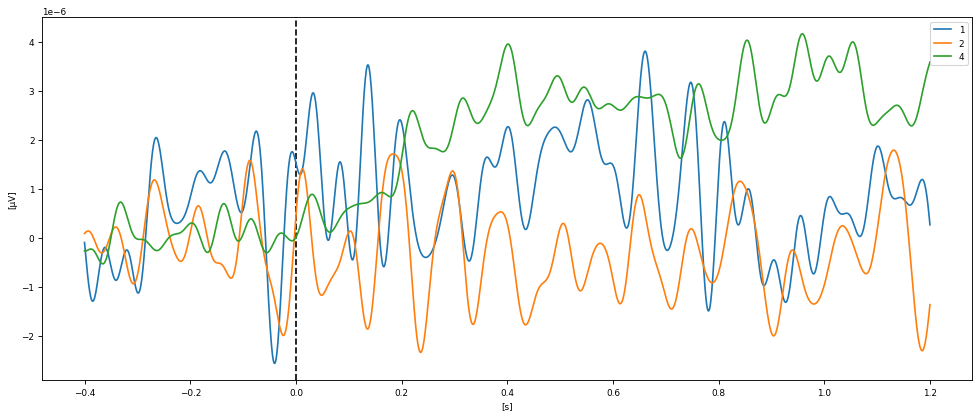

In [132]:
cda_all = dict()

for cond in cda_dict[list(cda_dict.keys())[0]].keys():
    cda_all[cond] = dict()

    for f in cda_dict.keys():
        if f == 'ER290419.bdf' and cond == '1':
            continue
        
        perf = 'bad'
        ldict = cda_dict[f][cond]['left']
        rdict = cda_dict[f][cond]['right']
        if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):            
            cda_dict_cur = (cda_dict[f][cond]['left'][perf] + cda_dict[f][cond]['right'][perf])/2
            if ~np.isnan(cda_dict_cur[0]):
                cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        elif (perf in ldict.keys() and len(ldict[perf])):
            cda_dict_cur = cda_dict[f][cond]['left'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur
        elif (perf in rdict.keys() and len(rdict[perf])):
            cda_dict_cur = cda_dict[f][cond]['right'][perf]
            if ~np.isnan(cda_dict_cur[0]):
                cda_all[cond] = np.vstack([cda_all[cond], cda_dict_cur]) if len(cda_all[cond]) else cda_dict_cur            
        else:
            print("==== SKIPPED: 0 points! (File: {} - Cond: {})".format(str(f), str(cond)))

plt.figure(figsize=(15, 6), dpi=80)
plt.axvline(x=0, color='k', linestyle='--')
plt.plot(times, cda_all['1'].mean(0), label='1')
plt.plot(times, cda_all['2'].mean(0), label='2')
plt.plot(times, cda_all['4'].mean(0), label='4')
plt.legend()
plt.ylabel('[μV]')
plt.xlabel('[s]')
#plt.savefig("./img/Villena-Gonzalez-2019_CDA-reprod.jpg", dpi=300)

## Analysis - Show Spread per subject

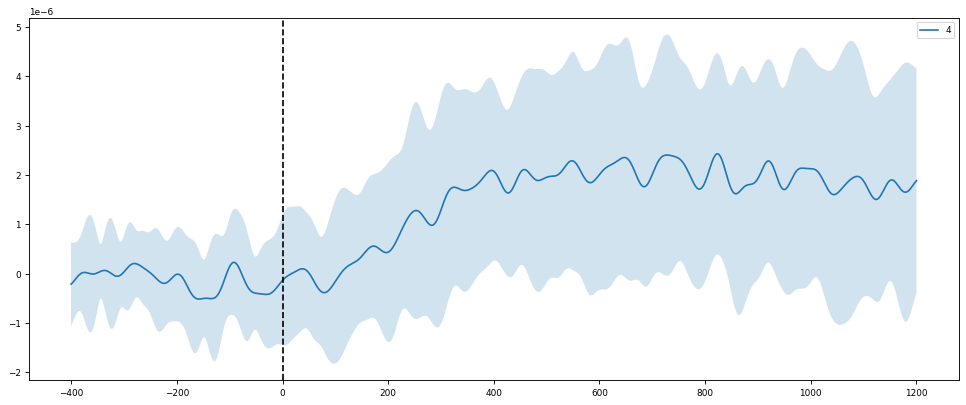

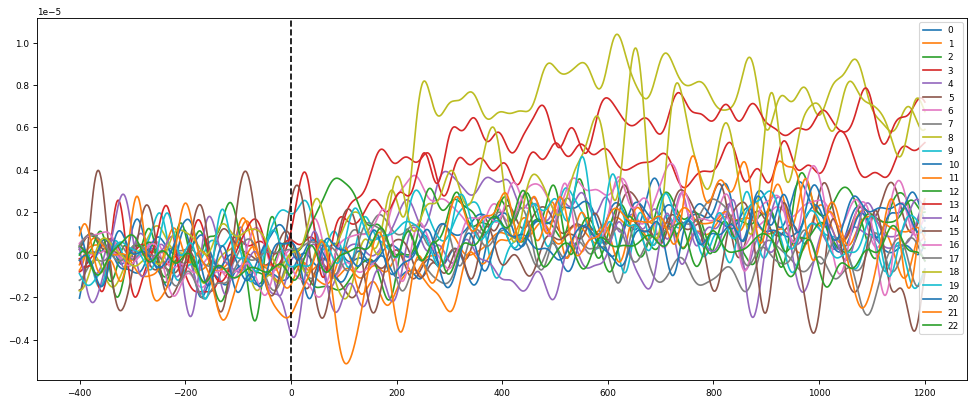

/var/folders/gn/5c249d_15xb7y6sdl7n8cn9m0000gn/T/ipykernel_13218/1036151030.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 3, figsize=(15,6))


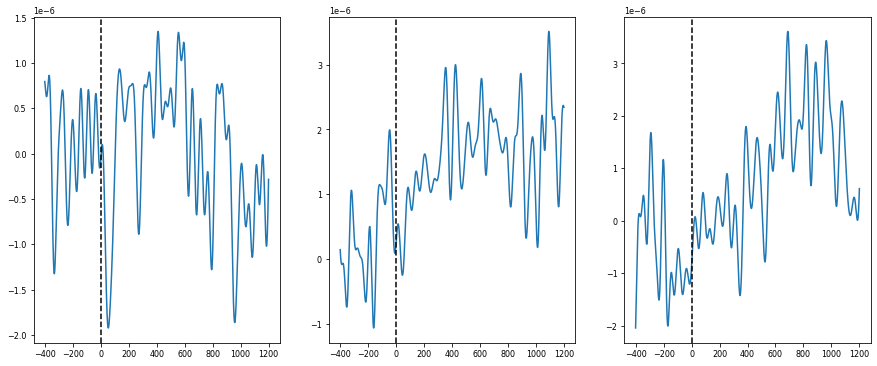

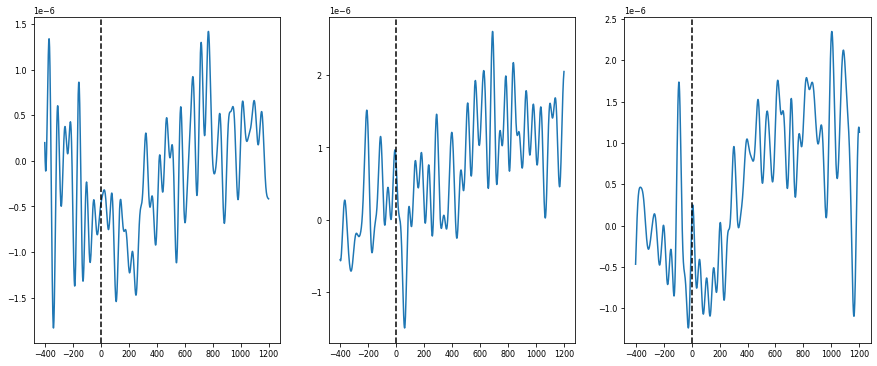

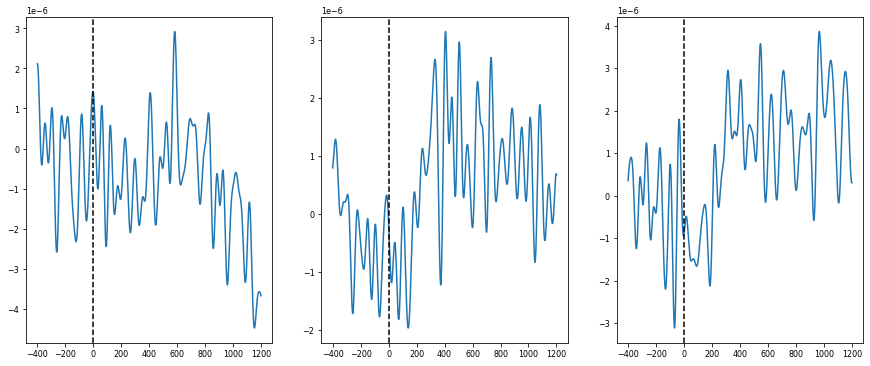

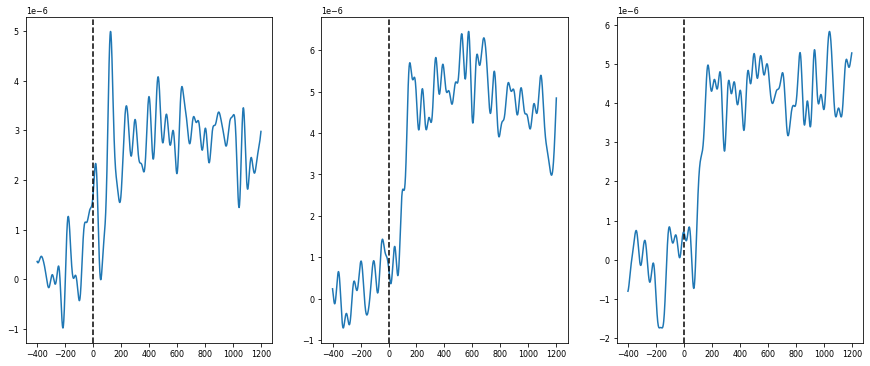

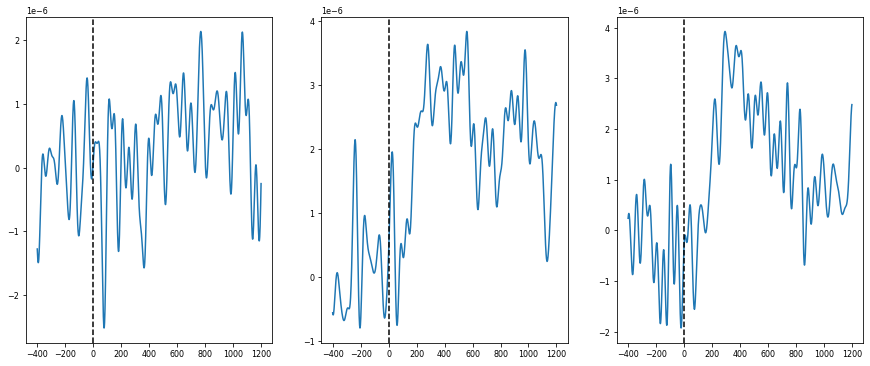

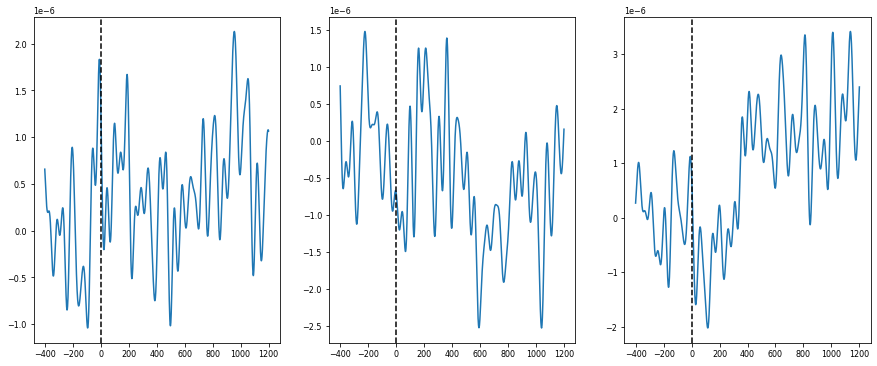

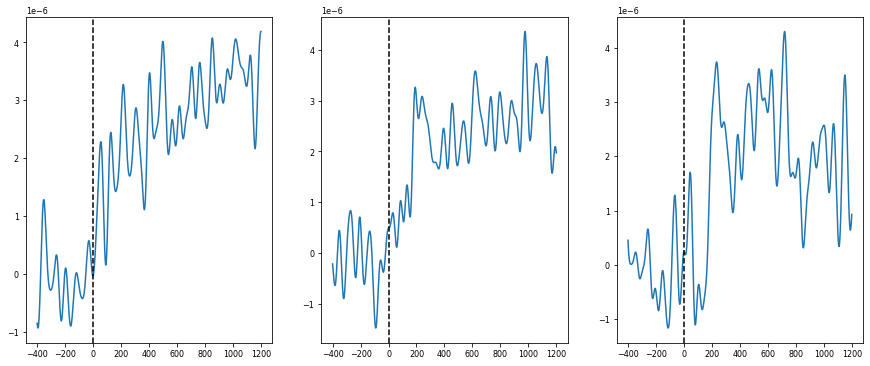

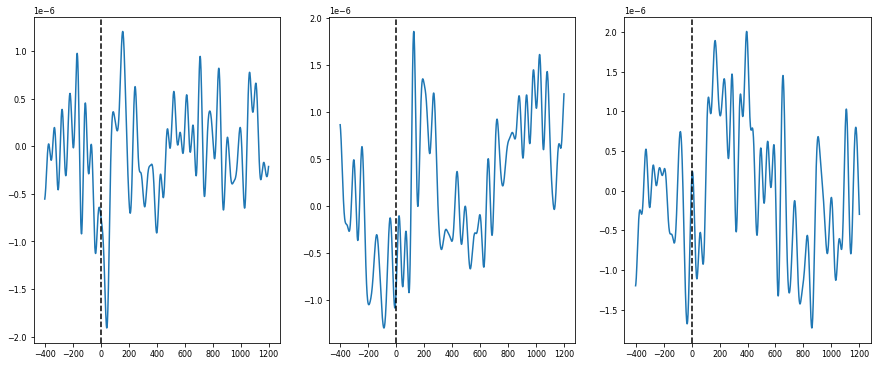

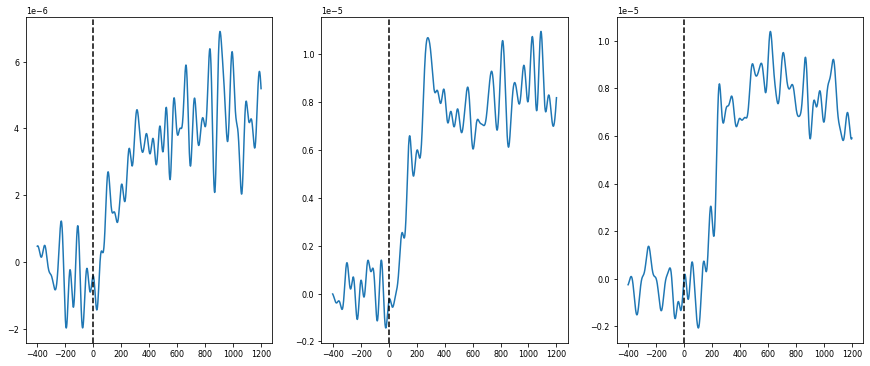

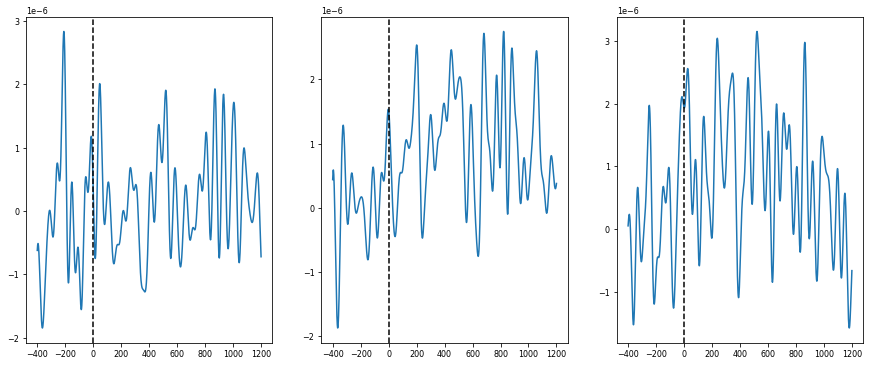

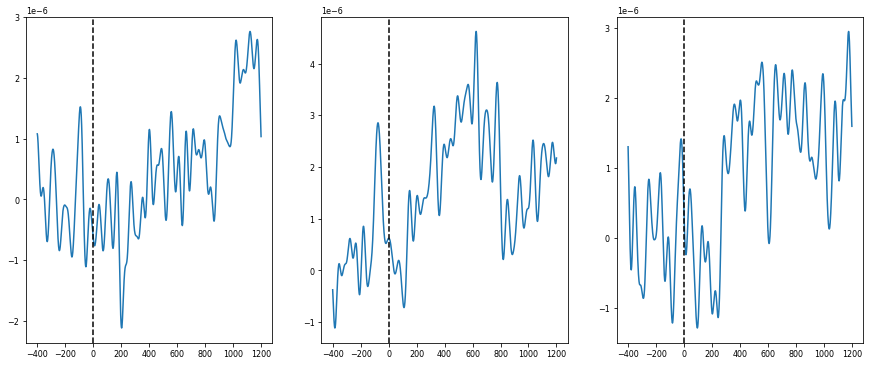

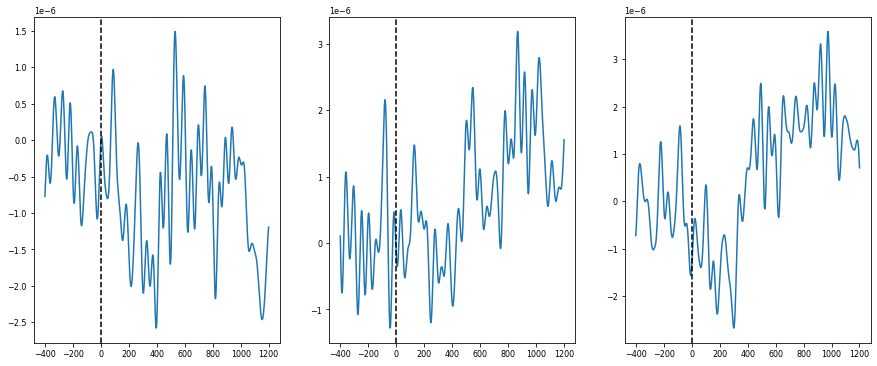

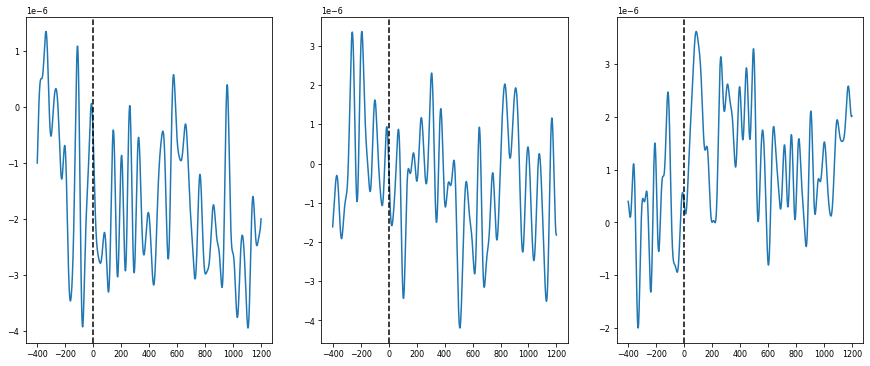

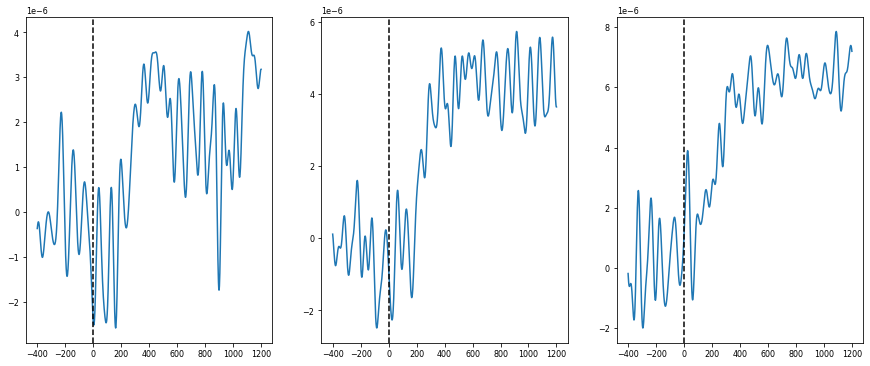

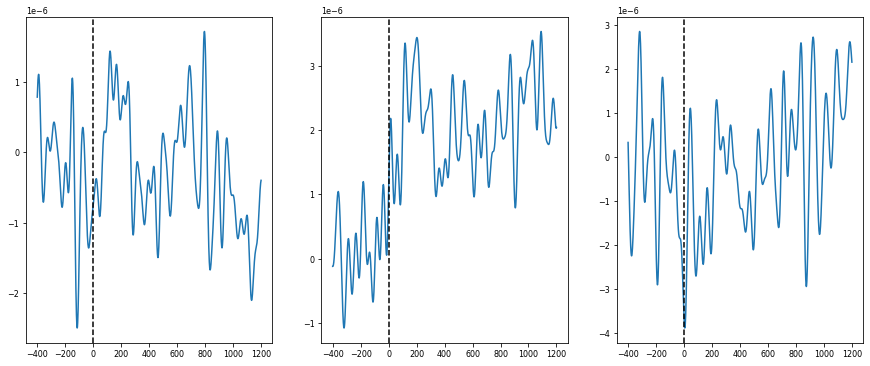

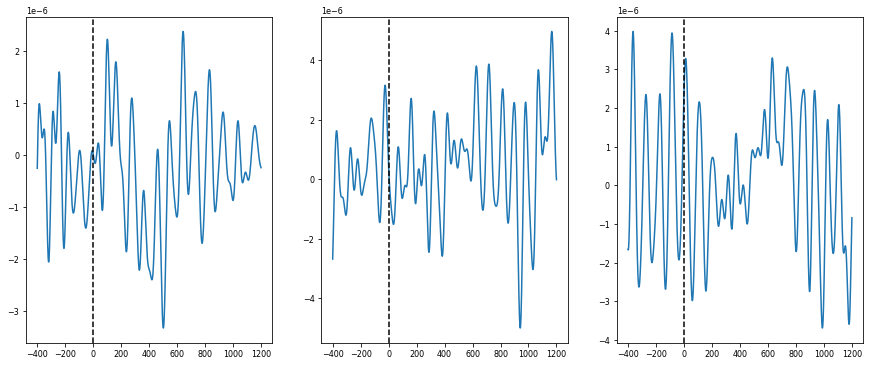

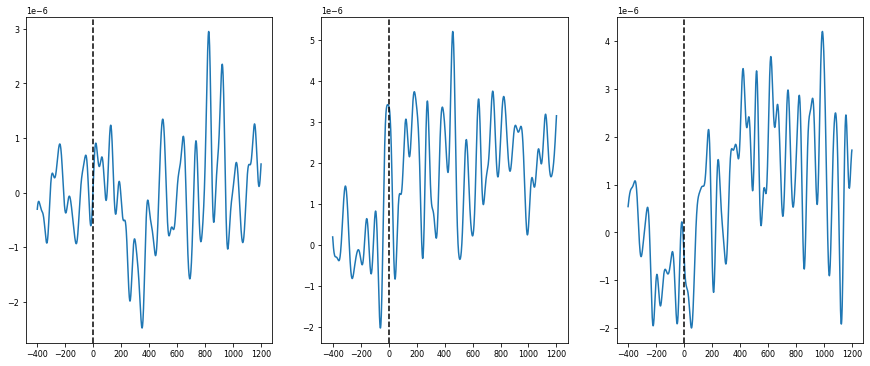

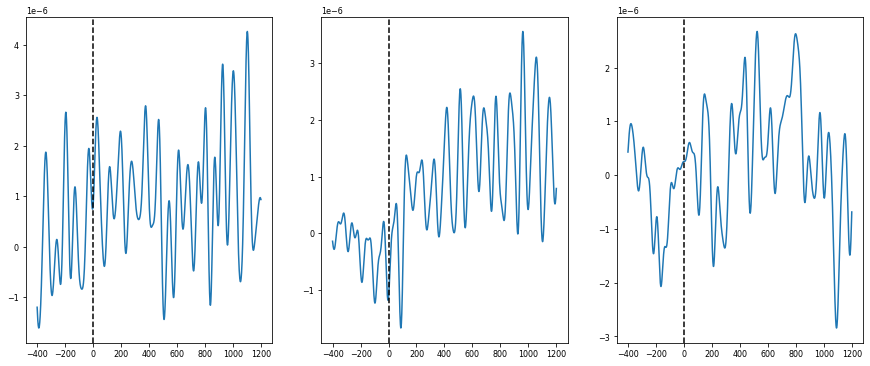

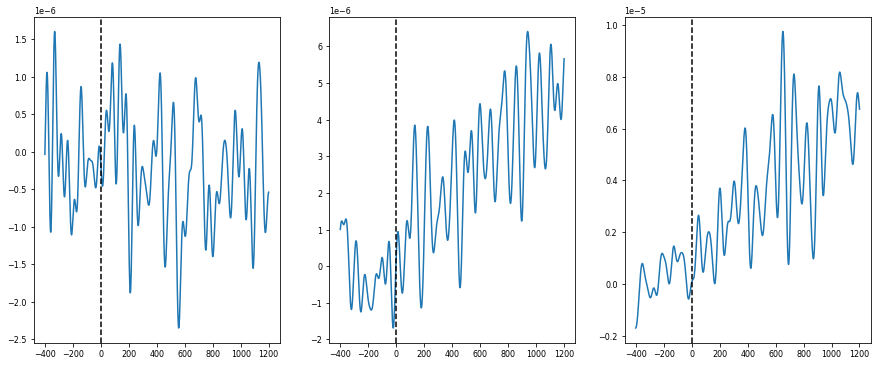

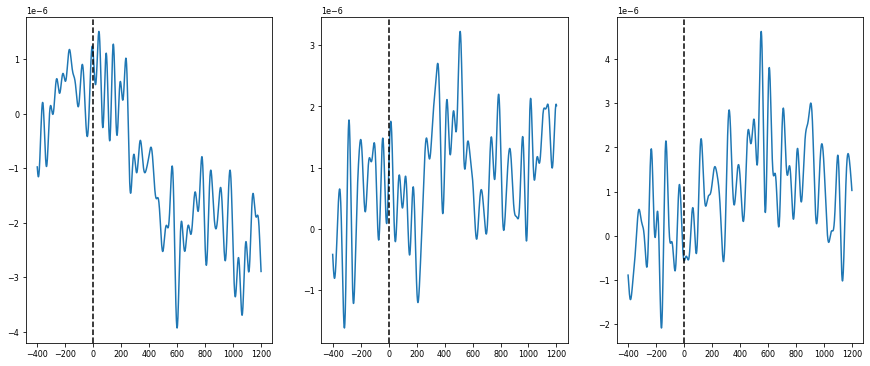

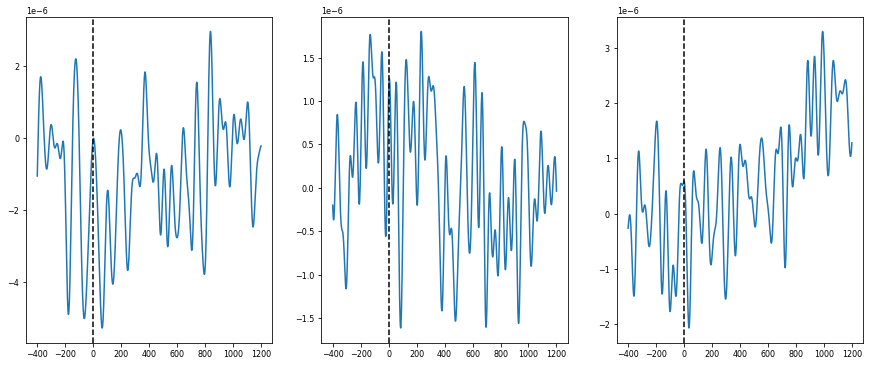

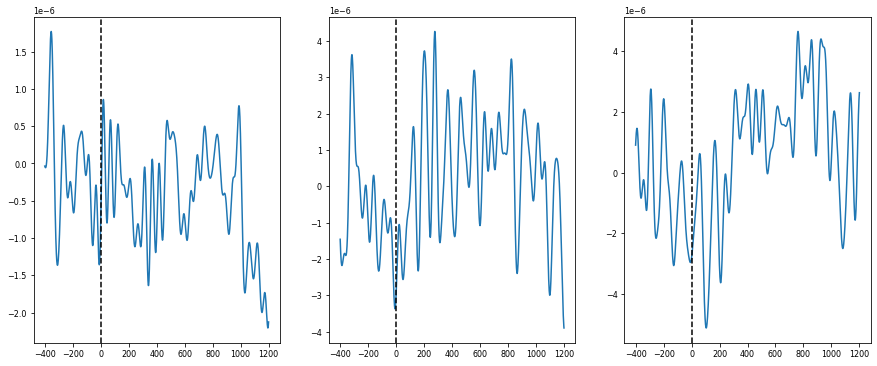

In [131]:
plt.figure(figsize=(15, 6), dpi=80)
means = cda_all['4'].mean(0)
stds = cda_all['4'].std(0)
plt.plot((times * 1000), means, label='4')
plt.fill_between((times * 1000), means-stds,means+stds,alpha=.2)

plt.axvline(x=0, color='k', linestyle='--')
#plt.gca().invert_yaxis()
plt.legend()
plt.show()

plt.rcParams.update({'font.size': 8})

plt.figure(figsize=(15, 6), dpi=80)
for i in range(len(cda_all['4'])):
    plt.plot((times * 1000), cda_all['4'][i,:], label='{}'.format(i))

plt.axvline(x=0, color='k', linestyle='--')
#plt.gca().invert_yaxis()
plt.legend()
plt.show()

#plt.figure(figsize=(15, 6), dpi=80)
for i in range(len(cda_all['1'])):
    fig, axs = plt.subplots(1, 3, figsize=(15,6))
    axs[0].plot((times * 1000), cda_all['1'][i,:], label='{}'.format(i))
    axs[0].axvline(x=0, color='k', linestyle='--')
    axs[1].plot((times * 1000), cda_all['2'][i,:], label='{}'.format(i))
    axs[1].axvline(x=0, color='k', linestyle='--')
    axs[2].plot((times * 1000), cda_all['4'][i,:], label='{}'.format(i))
    axs[2].axvline(x=0, color='k', linestyle='--')
    
#plt.gca().invert_yaxis()
#plt.legend()
plt.show()

# Analysis - Performance Report

In [11]:
# Remove duplicated columns...
report = report.loc[:,~report.columns.duplicated()]

## Subjects: Perf (Good/Bad) vs CDA Amp

Text(0, 0.5, 'Mean CDA Amplitude')

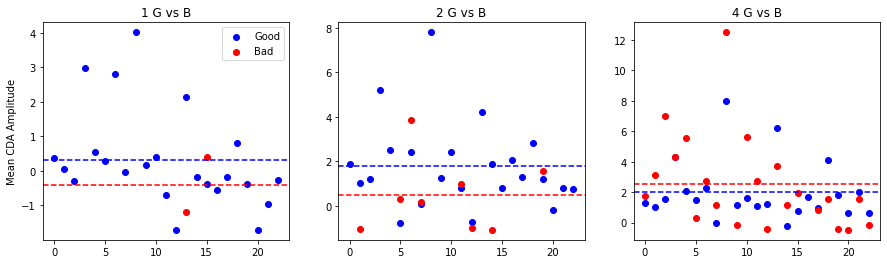

In [140]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    x = range(len(report['{}-right-good-CDA'.format(cond)]))
    
    # Good
    y = (report['{}-right-good-CDA'.format(cond)] + report['{}-left-good-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='blue', label='Good')
    axs[i].axhline(y=np.nanmean(y), color='blue', linestyle='--')
    # Bad
    y = (report['{}-right-bad-CDA'.format(cond)] + report['{}-left-bad-CDA'.format(cond)]) / 2
    axs[i].scatter(x=x, y=y, color='red', label='Bad')
    axs[i].axhline(y=np.nanmean(y), color='red', linestyle='--')
    
    axs[i].set_title('{} G vs B'.format(cond))
    #axs[i].invert_yaxis()
    
axs[0].legend()
axs[0].set_ylabel('Mean CDA Amplitude')


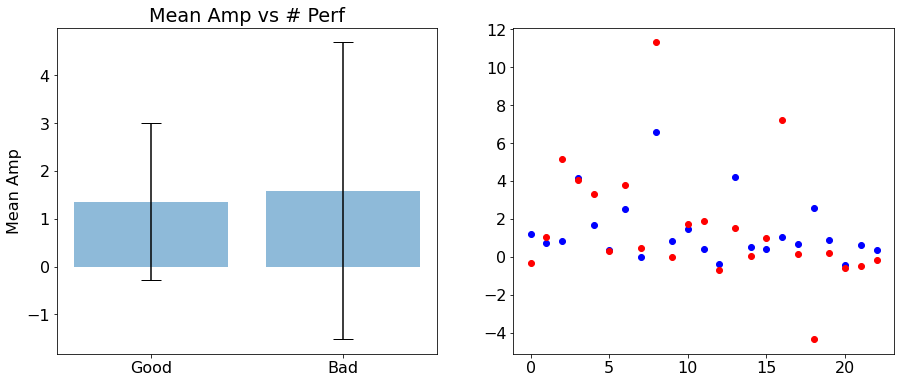

Corr Perf vs CDA Amp: (0.0458344762225355, 0.7622950400443369)


In [154]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))

# Data
goods = np.array(report['good-CDA'])
bads = np.array(report['bad-CDA'])

# Calculate the average
goods_mean = np.nanmean(goods)
bads_mean = np.nanmean(bads)

# Calculate the standard deviation
goods_std = np.nanstd(goods)
bads_std = np.nanstd(bads)

# Define labels, positions, bar heights and error bar heights
labels = ['Good', 'Bad']
x_pos = np.arange(len(labels))
CTEs = [goods_mean, bads_mean]
error = [goods_std, bads_std]

# Build the plot
axs[0].bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
axs[0].set_ylabel('Mean Amp')
axs[0].set_xticks(x_pos)
axs[0].set_xticklabels(labels)
axs[0].set_title('Mean Amp vs # Perf')
#axs[0].invert_yaxis()
#ax.yaxis.grid(True)

x = range(len(report['good-CDA']))
axs[1].scatter(x=x, y=report['good-CDA'], color='blue')
axs[1].scatter(x=x, y=report['bad-CDA'], color='red')

#plt.tight_layout()
plt.show()

import scipy
x = []
y = []
for p in perfs:
    for value in report['{}-CDA'.format(p)]:
        if p == 'good':
            x.append(1)
        else:
            x.append(2)
        y.append(value)

print('Corr Perf vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Condition vs CDA Amp

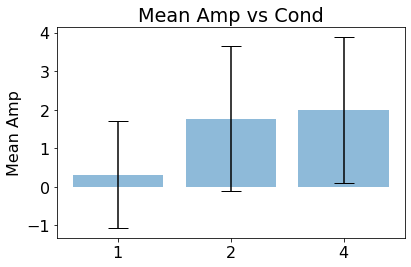

In [146]:
plt.rcParams.update({'font.size': 16})

data_conds = dict()
for cond in conds:
    data_conds[cond] = dict()
    data_conds[cond]['data'] = np.array(report['{}-good-CDA'.format(cond)])
    data_conds[cond]['mean'] = np.nanmean(data_conds[cond]['data'])
    data_conds[cond]['std'] = np.nanstd(data_conds[cond]['data'])
    
labels = conds
x_pos = np.arange(len(labels))
CTEs = [data_conds[cond]['mean'] for cond in conds]
error = [data_conds[cond]['std'] for cond in conds]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Amp')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Mean Amp vs Cond')
#ax.invert_yaxis()
#ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [147]:
# Pearson's Correlation
import scipy
x = []
y = []
set_sizes = [1,2,4]
for ss in set_sizes:
    for value in report['{}-good-CDA'.format(ss)]:
        x.append(ss)
        y.append(value)

scipy.stats.pearsonr(x,y)

(0.3247785205574374, 0.00647387437632328)

## Subjects: Side (Left/Right) vs CDA Amp

Corr Side vs CDA Amp: (0.09143565233491678, 0.5456122094352885)


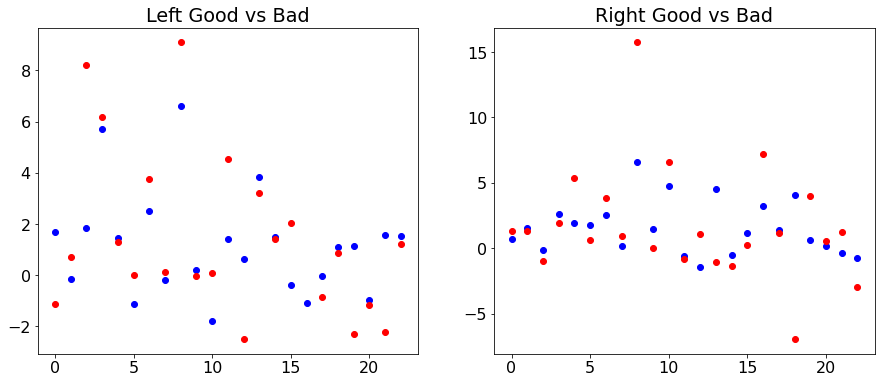

In [155]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, 2, figsize=(15,6))

x = range(len(report['left-good-CDA']))
axs[0].scatter(x=x, y=report['left-good-CDA'], color='blue')
x = range(len(report['left-bad-CDA']))
axs[0].scatter(x=x, y=report['left-bad-CDA'], color='red')
axs[0].set_title('Left Good vs Bad')

x = range(len(report['right-good-CDA']))
axs[1].scatter(x=x, y=report['right-good-CDA'], color='blue')
x = range(len(report['right-bad-CDA']))
axs[1].scatter(x=x, y=report['right-bad-CDA'], color='red')
axs[1].set_title('Right Good vs Bad')

x = []
y = []
for i, side in enumerate(sides):
    for value in report['{}-good-CDA'.format(side)]:
        x.append(i)
        y.append(value)

print('Corr Side vs CDA Amp: {}'.format(scipy.stats.pearsonr(x,y)))

## Subjects: Accuracy / Performance vs CDA Amp

Corr Perf Acc ~ 1: (-0.12256348335173892, 0.5774439414924684)
Corr Perf Acc ~ 2: (0.2757355054093133, 0.20284173747658596)
Corr Perf Acc ~ 4: (0.27895702662125355, 0.197400300766486)


Text(0, 0.5, 'CDA Mean Amp')

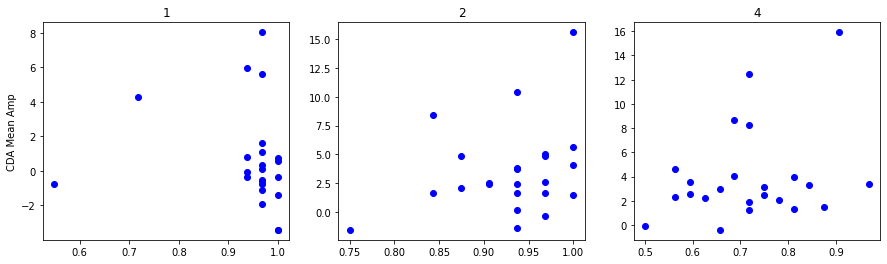

In [138]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, len(conds), figsize=(15,4))

for i, cond in enumerate(conds):
    goods = (report['{}-left-good'.format(cond)] + report['{}-right-good'.format(cond)])/2
    bads = (report['{}-left-bad'.format(cond)] + report['{}-right-bad'.format(cond)])/2
    x = goods / (goods + bads)
    y = report['{}-left-good-CDA'.format(cond)] + report['{}-right-good-CDA'.format(cond)]
    axs[i].scatter(x=x, y=y, color='blue')
    #axs[i].invert_yaxis()
    axs[i].set_title('{}'.format(cond))
    
    print('Corr Perf Acc ~ {}: {}'.format(cond, scipy.stats.pearsonr(x,y)))

axs[0].set_ylabel('CDA Mean Amp')

## Trials: Conditions vs Amp

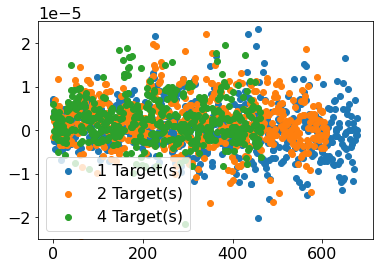

In [122]:
plt.figure(figsize=(15, 6), dpi=80)

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for side in sides:
            for value in perf_report_all[f][cond][side]['good']:
                y1.append(value)
    x1 = range(len(y1))

    plt.scatter(x=x1, y=y1, label='{} Target(s)'.format(cond))

plt.ylim(-2.5*1e-5,2.5*1e-5)
plt.legend()
plt.show()
    #axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    #axs[i].set_title('{} Target(s)'.format(cond))

## Trials: Good vs Bad

Cond = 1 Targets: 679 Good Perf Trials vs 101 Bad Perf Trials, with 3 outliers on graph.
Cond = 2 Targets: 610 Good Perf Trials vs 48 Bad Perf Trials, with 3 outliers on graph.
Cond = 4 Targets: 465 Good Perf Trials vs 182 Bad Perf Trials, with 2 outliers on graph.


Text(0, 0.5, 'CDA mean amplitude')

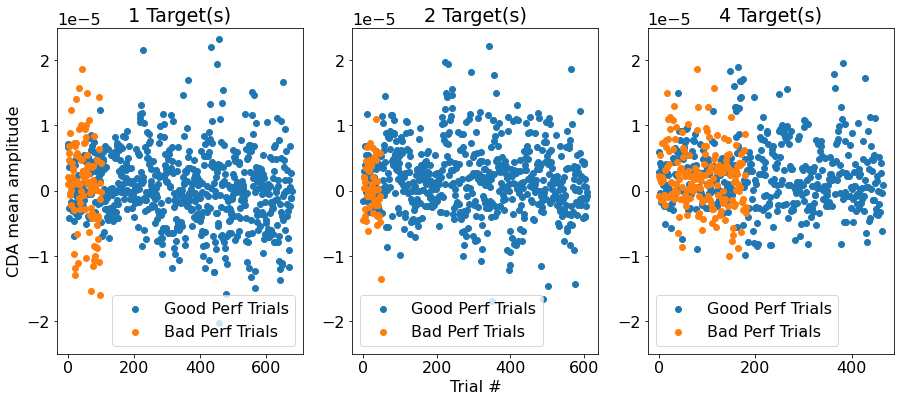

In [139]:
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
        for value in perf_report_all[f][cond]['right']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        if 'bad' in perf_report_all[f][cond]['left'].keys():
            for value in perf_report_all[f][cond]['left']['bad']:
                y2.append(value)
        if 'bad' in perf_report_all[f][cond]['right'].keys():
            for value in perf_report_all[f][cond]['right']['bad']:
                y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Good Perf Trials')
    axs[i].scatter(x=x2, y=y2, label='Bad Perf Trials')
    axs[i].legend()
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)
    axs[i].set_title('{} Target(s)'.format(cond))

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Perf Trials vs {} Bad Perf Trials, with {} outliers on graph.'.format(cond, len(y1), len(y2), nb_outliers))

axs[1].set_xlabel('Trial #')
axs[0].set_ylabel('CDA mean amplitude')
#fig.tight_layout(pad=1.0)

## Trials: Left vs Right

Cond = 1 Targets: 338 Good Left Trials vs 341 Good Right Trials, with 3 outliers on graph
Cond = 2 Targets: 305 Good Left Trials vs 305 Good Right Trials, with 3 outliers on graph
Cond = 4 Targets: 234 Good Left Trials vs 231 Good Right Trials, with 2 outliers on graph


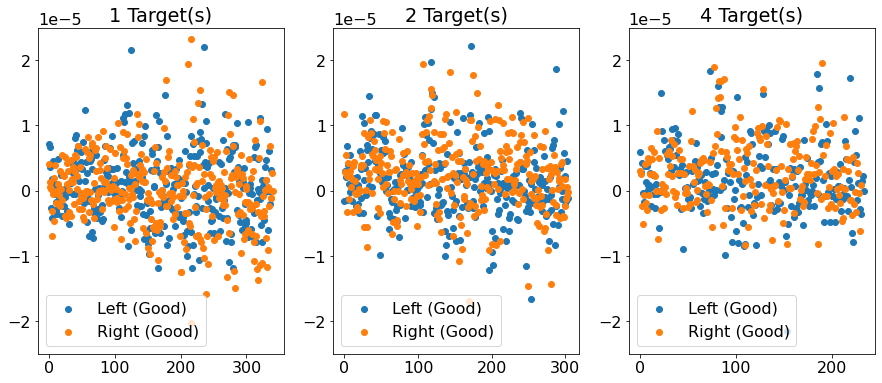

In [117]:
fig, axs = plt.subplots(1, len(conds), figsize=(15,6))

for i, cond in enumerate(conds):
    y1 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['left']['good']:
            y1.append(value)
    x1 = range(len(y1))

    y2 = []
    for f in perf_report_all.keys():
        for value in perf_report_all[f][cond]['right']['good']:
            y2.append(value)
    x2 = range(len(y2))

    axs[i].scatter(x=x1, y=y1, label='Left (Good)')
    axs[i].scatter(x=x2, y=y2, label='Right (Good)')
    axs[i].legend()
    axs[i].set_title('{} Target(s)'.format(cond))
    axs[i].set_ylim(-2.5*1e-5,2.5*1e-5)

    nb_outliers = len([val for val in (y1 + y2) if ((val*1e5) > 2.5) or ((val*1e5) < -2.5)])
    print('Cond = {} Targets: {} Good Left Trials vs {} Good Right Trials, with {} outliers on graph'.format(cond, len(y1), len(y2), nb_outliers))
        